# Basic Setup
### Import Necessary Libraries

In [148]:
import sqlite3 as sql3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Create Connection with Database

In [149]:
conn = sql3.connect("olist.db")

### View Table Names 

In [150]:
# creating cursor to access sqlite master
cur = conn.cursor()

# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(pd.Series(table_list))

0         (olist_order_customer_dataset,)
1                  (olist_order_dataset,)
2          (olist_order_reviews_dataset,)
3         (olist_order_payments_dataset,)
4            (olist_order_items_dataset,)
5               (olist_products_dataset,)
6                (olist_sellers_dataset,)
7            (olist_geolocation_dataset,)
8    (product_category_name_translation,)
dtype: object


### Retreive and Join Table

In [151]:
# access table products
query_product = ("SELECT * FROM olist_products_dataset")
product = pd.read_sql(query_product, conn)
product.set_index("index", inplace=True)

# access table items
query_items = ("SELECT * FROM olist_order_items_dataset")
items = pd.read_sql(query_items, conn)
items.set_index("index", inplace=True)

# left join the tables on product_id
table = pd.merge(product, items, on="product_id", how="left")

In [152]:
# view table info
print(table.shape)
table.info()

(112650, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  112650 non-null  object 
 1   product_category_name       111047 non-null  object 
 2   product_name_lenght         111047 non-null  float64
 3   product_description_lenght  111047 non-null  float64
 4   product_photos_qty          111047 non-null  float64
 5   product_weight_g            112632 non-null  float64
 6   product_length_cm           112632 non-null  float64
 7   product_height_cm           112632 non-null  float64
 8   product_width_cm            112632 non-null  float64
 9   order_id                    112650 non-null  object 
 10  order_item_id               112650 non-null  int64  
 11  seller_id                   112650 non-null  object 
 12  shipping_limit_date         112650 non-null  object 
 13  p

# Pre-Processing
### Get Relevant Data

In [153]:
# remove unnecessary columns
columns_to_drop = ["seller_id",
                   "shipping_limit_date",
                   "freight_value"]

table.drop(columns_to_drop, axis=1, inplace=True)
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  112650 non-null  object 
 1   product_category_name       111047 non-null  object 
 2   product_name_lenght         111047 non-null  float64
 3   product_description_lenght  111047 non-null  float64
 4   product_photos_qty          111047 non-null  float64
 5   product_weight_g            112632 non-null  float64
 6   product_length_cm           112632 non-null  float64
 7   product_height_cm           112632 non-null  float64
 8   product_width_cm            112632 non-null  float64
 9   order_id                    112650 non-null  object 
 10  order_item_id               112650 non-null  int64  
 11  price                       112650 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 11.2+ MB


### Impute Missing Values

In [154]:
# calculate the presentation of missing values in each column
table.isna().sum() / len(table) * 100

product_id                    0.000000
product_category_name         1.422992
product_name_lenght           1.422992
product_description_lenght    1.422992
product_photos_qty            1.422992
product_weight_g              0.015979
product_length_cm             0.015979
product_height_cm             0.015979
product_width_cm              0.015979
order_id                      0.000000
order_item_id                 0.000000
price                         0.000000
dtype: float64

In [155]:
# migrate the not Na rows to a new table
table2 = table[table['product_category_name'].notna()]

# calculate Nan percentage of the new table
table2.isna().sum() / len(table)

product_id                    0.000000
product_category_name         0.000000
product_name_lenght           0.000000
product_description_lenght    0.000000
product_photos_qty            0.000000
product_weight_g              0.000009
product_length_cm             0.000009
product_height_cm             0.000009
product_width_cm              0.000009
order_id                      0.000000
order_item_id                 0.000000
price                         0.000000
dtype: float64

<AxesSubplot: xlabel='product_width_cm', ylabel='Count'>

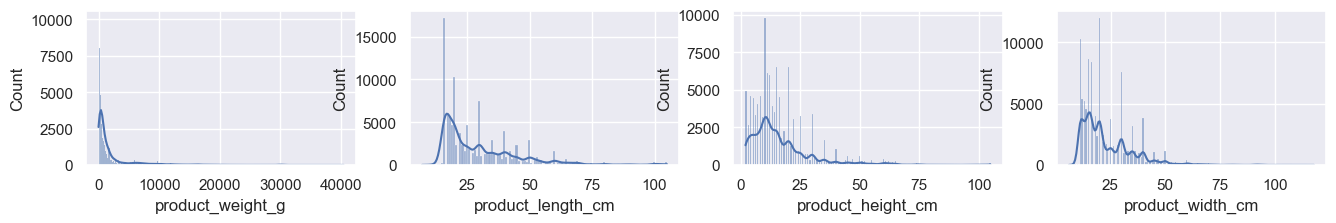

In [156]:
# histogram plot to see distribution
fig, axes = plt.subplots(1,4, figsize=(16, 2))
sns.histplot(data=table2, x="product_weight_g", ax=axes[0], kde="True")
sns.histplot(data=table2, x="product_length_cm", ax=axes[1], kde="True")
sns.histplot(data=table2, x="product_height_cm", ax=axes[2], kde="True")
sns.histplot(data=table2, x="product_width_cm", ax=axes[3], kde="True")

In [157]:
# impute missing values using median of each
table2["product_weight_g"].fillna(table2["product_weight_g"].median(), inplace=True)
table2["product_length_cm"].fillna(table2["product_length_cm"].median(), inplace=True)
table2["product_height_cm"].fillna(table2["product_height_cm"].median(), inplace=True)
table2["product_width_cm"].fillna(table2["product_width_cm"].median(), inplace=True)

# re-check the NaN percentage
table2.isna().sum() / len(table) * 100

C:\Users\651345\AppData\Local\Temp\ipykernel_18224\3979295721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2["product_weight_g"].fillna(table2["product_weight_g"].median(), inplace=True)
C:\Users\651345\AppData\Local\Temp\ipykernel_18224\3979295721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2["product_length_cm"].fillna(table2["product_length_cm"].median(), inplace=True)
C:\Users\651345\AppData\Local\Temp\ipykernel_18224\3979295721.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

product_id                    0.0
product_category_name         0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
order_id                      0.0
order_item_id                 0.0
price                         0.0
dtype: float64

### Duplication Checking

In [158]:
table2[table2.duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,price


### Fix Inconsistent Format

In [159]:
# retrieve unique categories in the table
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(table2["product_category_name"].unique())

['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'fashion_roupa_masculina'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'telefonia_fixa'
 'construcao_ferramentas_iluminacao' 'livros_tecnicos'
 'eletrodomesticos_2' 'artigos_de_festas' 'bebidas' 'market_place'
 'la_cuisine' 'construca

In [160]:
# grouping the category for consistency
map_category = {    
    "construcao_ferramentas_construcao" : "construcao_ferramentas",
    "construcao_ferramentas_ferramentas" : "construcao_ferramentas",
    "construcao_ferramentas_jardim" : "ferramentas_jardim",
    
    "livros_tecnicos" : "livros",
    "livros_interesse_geral" : "livros",
    "livros_importados" : "livros",
    
    "eletrodomesticos_2" : "eletrodomesticos",
    "casa_conforto_2" : "casa_conforto",
    "portateis_cozinha_e_preparadores_de_alimentos" : "la_cuisine",
    
    "artes_e_artesanato" : "artes",
    "informatica_acessorios" : "pcs",
    "pc_gamer" : "pcs",
    
    "tablets_impressao_imagem" : "electronicos",
    "telefonia_fixa" : "telefonia",

    "bebidas" : "alimentos_bebidas",
    "alimentos" : "alimentos_bebidas",
    "artigos_de_natal" : "artigos_de_festas",
}

table2["product_category_name"].replace(map_category, inplace=True)
pd.Series(table2["product_category_name"].unique())

C:\Users\651345\AppData\Local\Temp\ipykernel_18224\178096541.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2["product_category_name"].replace(map_category, inplace=True)


0                                         perfumaria
1                                              artes
2                                      esporte_lazer
3                                              bebes
4                              utilidades_domesticas
5                              instrumentos_musicais
6                                         cool_stuff
7                                   moveis_decoracao
8                                   eletrodomesticos
9                                         brinquedos
10                                   cama_mesa_banho
11                  construcao_ferramentas_seguranca
12                                               pcs
13                                      beleza_saude
14                                  malas_acessorios
15                                ferramentas_jardim
16                                 moveis_escritorio
17                                        automotivo
18                                       eletr

### Handling Incorrect Datatype

In [161]:
# convert float columns to integer
table2["product_name_lenght"] = table2["product_name_lenght"].astype(int)
table2["product_description_lenght"] = table2["product_description_lenght"].astype(int)
table2["product_photos_qty"] = table2["product_photos_qty"].astype(int)
table2["product_weight_g"] = table2["product_weight_g"].astype(int)
table2["product_length_cm"] = table2["product_length_cm"].astype(int)
table2["product_height_cm"] = table2["product_height_cm"].astype(int)
table2["product_width_cm"] = table2["product_width_cm"].astype(int)
table2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111047 entries, 0 to 112649
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  111047 non-null  object 
 1   product_category_name       111047 non-null  object 
 2   product_name_lenght         111047 non-null  int32  
 3   product_description_lenght  111047 non-null  int32  
 4   product_photos_qty          111047 non-null  int32  
 5   product_weight_g            111047 non-null  int32  
 6   product_length_cm           111047 non-null  int32  
 7   product_height_cm           111047 non-null  int32  
 8   product_width_cm            111047 non-null  int32  
 9   order_id                    111047 non-null  object 
 10  order_item_id               111047 non-null  int64  
 11  price                       111047 non-null  float64
dtypes: float64(1), int32(7), int64(1), object(3)
memory usage: 8.0+ MB


C:\Users\651345\AppData\Local\Temp\ipykernel_18224\122068927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2["product_name_lenght"] = table2["product_name_lenght"].astype(int)
C:\Users\651345\AppData\Local\Temp\ipykernel_18224\122068927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2["product_description_lenght"] = table2["product_description_lenght"].astype(int)
C:\Users\651345\AppData\Local\Temp\ipykernel_18224\122068927.py:6: SettingWithCopyWarning: 
A value is trying to be set on a

### Outlier Handling 

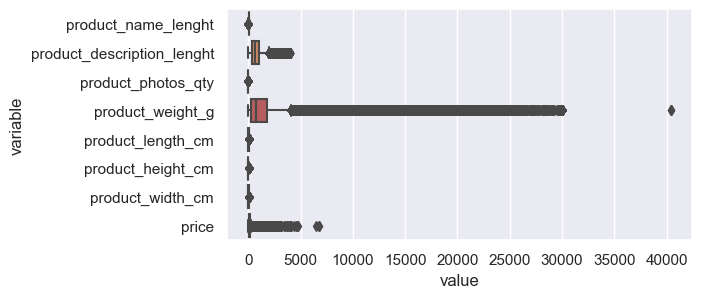

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,111047.0,48.775978,10.025581,5.00,42.0,52.00,57.0,76.0
product_description_lenght,111047.0,787.867029,652.135608,4.00,348.0,603.00,987.0,3992.0
product_photos_qty,111047.0,2.209713,1.721438,1.00,1.0,1.00,3.0,20.0
product_weight_g,111047.0,2099.967050,3754.770669,0.00,300.0,700.00,1800.0,40425.0
product_length_cm,111047.0,30.210956,16.189286,7.00,18.0,25.00,38.0,105.0
product_height_cm,111047.0,16.626329,13.467404,2.00,8.0,13.00,20.0,105.0
product_width_cm,111047.0,23.041928,11.716610,6.00,15.0,20.00,30.0,118.0
order_item_id,111047.0,1.198213,0.706872,1.00,1.0,1.00,1.0,21.0
price,111047.0,120.778665,183.419692,0.85,39.9,74.99,134.9,6735.0


In [162]:
# create dataframe of numerical columns to plot
outlier_check = pd.DataFrame(data = table2,
                             columns = ['product_name_lenght','product_description_lenght',
                                        'product_photos_qty','product_weight_g',
                                        'product_length_cm','product_height_cm',
                                        'product_width_cm', 'price'])

# set plot size
sns.set(rc={'figure.figsize':(6,3)})

# plot dataframe
sns.boxplot(x="value", y="variable", data=pd.melt(outlier_check), orient="h")

# show boxplot
plt.show()

# calculate statistical descriptive of each column
table2.describe().transpose()

C:\Users\651345\AppData\Local\Temp\ipykernel_18224\3111714486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2.drop(table2[table2["product_weight_g"]==40425.0].index, inplace=True)


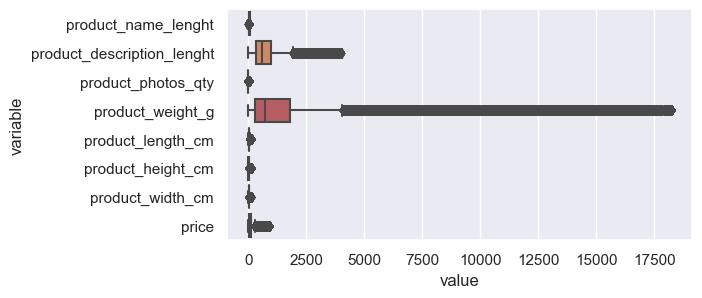

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,111044.0,48.775702,10.025576,5.00,42.0,52.00,57.0,76.0
product_description_lenght,111044.0,787.873888,652.143082,4.00,348.0,603.00,987.0,3992.0
product_photos_qty,111044.0,2.209746,1.721450,1.00,1.0,1.00,3.0,20.0
product_weight_g,111044.0,2038.873023,3403.129165,0.00,300.0,700.00,1800.0,18214.0
product_length_cm,111044.0,30.211421,16.189258,7.00,18.0,25.00,38.0,105.0
product_height_cm,111044.0,16.625023,13.465239,2.00,8.0,13.00,20.0,105.0
product_width_cm,111044.0,23.041794,11.716740,6.00,15.0,20.00,30.0,118.0
order_item_id,111044.0,1.198219,0.706881,1.00,1.0,1.00,1.0,21.0
price,111044.0,115.439123,136.630401,0.85,39.9,74.99,134.9,890.0


In [163]:
# drop extreme outliers in product weight
table2.drop(table2[table2["product_weight_g"]==40425.0].index, inplace=True)

#Calculate Upper limit of product weight (99th Percentile)
p99_weight = int(table2["product_weight_g"].quantile(q=0.99))
table2.loc[table2["product_weight_g"] > p99_weight, "product_weight_g"] = p99_weight

#Calculate Upper limit of product weight (99th Percentile)
p99_price = table2["price"].quantile(q=0.99)
table2.loc[table2["price"] > p99_price, "price"] = p99_price

# re-check whether the outlier handling performed
outlier_check = pd.DataFrame(data = table2,
                             columns = ['product_name_lenght','product_description_lenght',
                                        'product_photos_qty','product_weight_g',
                                        'product_length_cm','product_height_cm',
                                        'product_width_cm', 'price'])

sns.set(rc={'figure.figsize':(6,3)})
sns.boxplot(x="value", y="variable", data=pd.melt(outlier_check), orient="h")
plt.show()
table2.describe().transpose()

# Data Analysis
### Case 1 - Best Selling Category

In [171]:
# count order_id by product category
best_selling_category = table2[["product_category_name", "order_id"]].groupby("product_category_name").agg("count")

# sort best-selling category from most to least
best_selling_category = best_selling_category.sort_values(by=["order_id"], ascending=False)

# show top 3 and bottom 3
with pd.option_context('display.max_rows',6):
    print(best_selling_category)

                               order_id
product_category_name                  
cama_mesa_banho                   11112
beleza_saude                       9670
esporte_lazer                      8641
...                                 ...
cds_dvds_musicais                    14
fashion_roupa_infanto_juvenil         8
seguros_e_servicos                    2

[59 rows x 1 columns]


### Case 2 - Price Range of TOP #1 Category

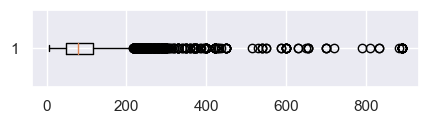

,count,mean,std,min,25%,50%,75%,max
price,10157.0,94.209317,73.715473,6.99,49.89,79.9,116.9,890.0


In [172]:
# create table consists of order_id, product_id, and price of cama_mesa_banho products
cama_mesa_banho = table2.loc[table2["product_category_name"] == "cama_mesa_banho"][
                 ["order_id","product_id", "product_category_name", "price"]
                 ].drop_duplicates().reset_index().drop("index", axis=1)

# set plot size
fig = plt.figure(figsize =(5,1))
 
# Create plot
plot = plt.boxplot(cama_mesa_banho["price"], vert=False)
 
# show plot
plt.show()
cama_mesa_banho.describe().transpose()

### Case 3 - Correlation between charateristics

<AxesSubplot: >

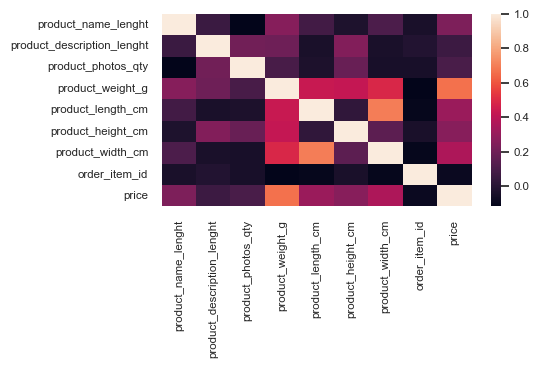

In [201]:
# set plot size
sns.set(rc={'figure.figsize':(5,2.5)})
sns.set(font_scale=0.75)

# calculate correlation value between numerical columns
corr = table2.loc[table2["product_category_name"] == "cama_mesa_banho"].drop_duplicates().corr(method="pearson")

# plot the value to heatmap
sns.heatmap(corr)

### Case 4 - TOP 10 Product of The Best Category

In [249]:
# count order_id by product id
best_selling_cama = table2[table2["product_category_name"] == "cama_mesa_banho"
                          ][["product_id","order_id"]].groupby("product_id").agg("count")

# sort best-selling product
best_selling_cama = best_selling_cama.sort_values(by=["order_id"], ascending=False).reset_index()

# show top 3 and bottom 3
with pd.option_context('display.max_rows',6):
    print(best_selling_cama)

                            product_id  order_id
0     99a4788cb24856965c36a24e339b6058       488
1     f1c7f353075ce59d8a6f3cf58f419c9c       154
2     06edb72f1e0c64b14c5b79353f7abea3       143
...                                ...       ...
3025  6947c3397dae24c49aa4b34b68bf3b09         1
3026  693e8a3550dfe12cd2a3f2a3f01b6130         1
3027  7ddb6ba690b14dee5c0f2d372e034cec         1

[3028 rows x 2 columns]


### Case 5 - Characteristic of TOP 10 Products

In [275]:
# store the id of top 10 product in variable
best_product = best_selling_cama.loc[0:9,"product_id"].tolist()

# store the values of top 10 product in new dataframe
top10_cama = table2.loc[table2['product_id'].isin(best_product)][
                        ['product_id','product_name_lenght','product_description_lenght',
                        'product_photos_qty','product_weight_g','product_length_cm',
                        'product_height_cm','product_width_cm', 'price']].drop_duplicates()

# plot descriptive analysis
top10_cama.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,53.0,52.000000,6.639045,38.000000,46.000000,55.000000,56.000000,60.000000
product_description_lenght,53.0,348.622642,206.832450,161.000000,162.000000,279.000000,329.000000,744.000000
product_photos_qty,53.0,2.283019,1.758248,1.000000,1.000000,1.000000,5.000000,5.000000
product_weight_g,53.0,0.523512,0.056097,0.405529,0.497043,0.513004,0.593473,0.600865
product_length_cm,53.0,0.207444,0.040338,0.114287,0.188666,0.215757,0.230186,0.261519
product_height_cm,53.0,0.050610,0.049274,-0.044269,0.033094,0.033094,0.059233,0.155750
product_width_cm,53.0,0.182194,0.032924,0.106787,0.169416,0.185111,0.204679,0.223262
price,53.0,105.174151,48.445495,38.790000,79.900000,88.000000,148.900000,215.000000
